# Inverse Laplace Transform

* Pole/Residue Decomposition
* Partial fraction decomposition
* Final value theorem

## Pole/Residue Decomposition

In [1]:
%matplotlib inline
import control
import sympy
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as  plt

In [2]:
s = control.tf([1, 0], [0, 1])
G = (s+1)/(s**2 + 1*s + 2)
G


   s + 1
-----------
s^2 + s + 2

In [3]:
r_vect, p_vect, k = sig.residue(G.num[0][0], G.den[0][0])
r_vect, p_vect, k

(array([0.5-0.18898224j, 0.5+0.18898224j]),
 array([-0.5+1.32287566j, -0.5-1.32287566j]),
 array([0.]))

We now reconstruct the signal using the inverse laplace transform for each pole/residue term.

$g(t) = \mathcal{L}^{-1}\left[\sum\limits_{i=1}^{k} \dfrac{R_i}{s-p_i}\right] = \sum\limits_{i=1}^{k} R_i e^{p_it}$

The residue may be found in general even for for repeated roots or order $m$, using:

$F(s) = \dots + \sum\limits_{k=0}^{m-1}\dfrac{r_k}{(s-p)^{m-k}}$


$ r_k = \dfrac{1}{k!}\left[ \dfrac{d^k}{ds^k} (s-p)^m F(s)\right]_{s=p}$

In [4]:
t = np.linspace(0, 20, 100)
y = np.zeros(len(t), dtype=np.complex)
for r, p in zip(r_vect, p_vect):
    y += r*np.exp(p*t)
assert np.linalg.norm(np.imag(y) < 1e-10)  # make sure imaginary is negligible
y = np.real(y)

We compare this to the impulse response of $G(s)$, which should be the same.

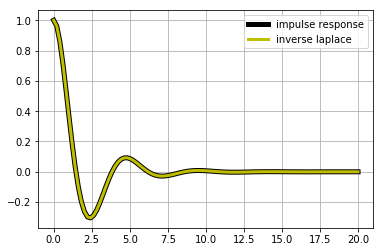

In [5]:
t_imp, y_imp = control.impulse_response(G, T=t)
plt.plot(t_imp, y_imp, 'k', linewidth=5, label='impulse response')
plt.plot(t, y, 'y', linewidth=3, label='inverse laplace')
plt.grid()
plt.legend()

## DC Motor Example

<img src="fig/dc-motor.png" alt="Drawing" style="width: 400px;" align="left"/>


The torque, $T$, is proportional to the current, $i$ with constant $K$:

$T = K i$

The back EMF is proportional to the shaft rotational speed with constant $K$:

$e = K\dot{\theta}$

The equation of motion for the motor shaft is:

$J \ddot{\theta} + b \dot{\theta} = T$

Kirchhoff's voltage law gives:

$L \dfrac{di}{dt} + Ri = V - e$

Equations of motion and transfer function derived in hotseat exercise.

## Final Value Theorem

In [6]:
G2 = 1/ (s*(s**2 + 2*s + 2))
G2


        1
-----------------
s^3 + 2 s^2 + 2 s

The final value theorem, is typicaly stated as:

$\lim\limits_{t \rightarrow \infty} y(t) = \lim\limits_{s \rightarrow 0} s Y(s)$

Note that this definition is a more general than the version in the book which may be considered to be a DC gain theorem. And only applies for constant input signals. This version applies for arbitary input signals.

0 states have been removed from the model
1 states have been removed from the model
U: 1
final value: 0.5000000000000002


/home/jgoppert/anaconda3/envs/aae301/lib/python3.7/site-packages/control/timeresp.py:570: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output. 
Results may be meaningless!
  warnings.warn('System has direct feedthrough: ``D != 0``. The infinite '


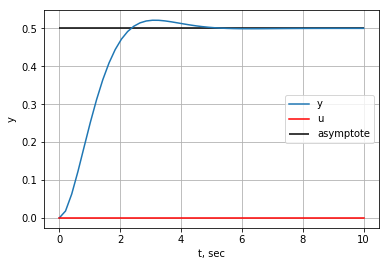

0 states have been removed from the model
1 states have been removed from the model
U: 
1
-
s

final value: inf


/home/jgoppert/anaconda3/envs/aae301/lib/python3.7/site-packages/control/xferfcn.py:575: RuntimeWarning: divide by zero encountered in double_scalars
  polyval(self.den[i][j], s))


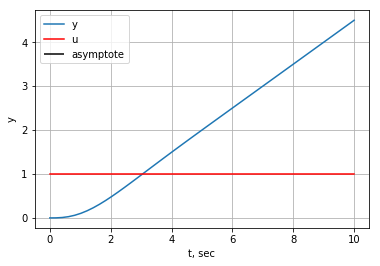

0 states have been removed from the model
1 states have been removed from the model
U: 
 1
---
s^2

final value: inf


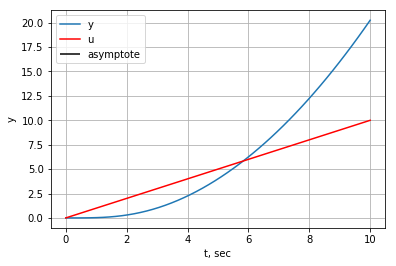

In [7]:
for U in [1, 1/s, 1/s**2]:
    Y = control.minreal(G2*U)
    final_value = np.real(control.minreal(s*Y).horner(0)[0][0])
    
    print('U:', U)
    print('final value:', final_value)
    
    plt.figure()
    t, u = control.impulse_response(U, T=np.linspace(0, 10))
    t, y = control.impulse_response(G2*U, T=np.linspace(0, 10))
    plt.hlines(final_value, t[0], t[-1], label='asymptote')
    plt.plot(t, y, label='y')
    plt.plot(t, u, 'r', label='u')
    plt.xlabel('t, sec')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()